In [1]:
import sys
sys.path.append('../')
import utils
import models
import numpy as np 
import matplotlib.pyplot as plt 
import cv2 

import tensorflow as tf 
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)

model = models.build_model_skip(None, None, 3)

x_data, y_data = utils.load_dataset_sice()
   
keys = list(x_data.keys())

Using TensorFlow backend.
2 Physical GPUs, 2 Logical GPUs

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, None, None, 6 1792        input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, None, None, 6 256         conv2d_1[0][0]                   
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, None, None, 6 36928       batch_normalization_1[0][0]      
_________________________________

In [135]:
model.load_weights('./weights/batch_16_model_skip/my_model.900.h5')

Text(0.5, 1.0, 'gt')

<Figure size 432x288 with 0 Axes>

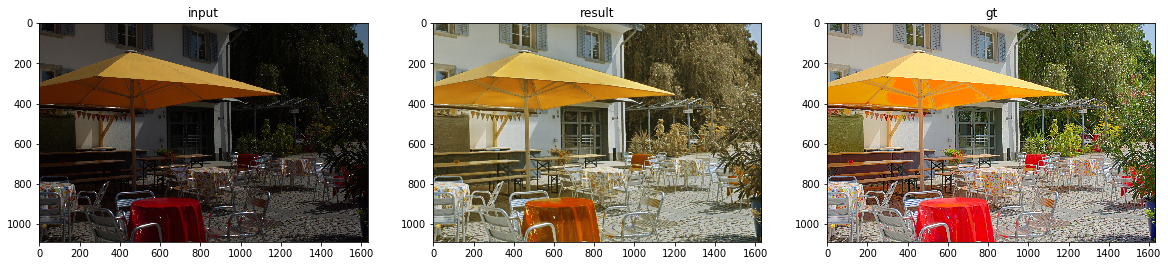

In [137]:

index = -5
x_test_img = cv2.imread(x_data[keys[index]])     
y_test_img = cv2.imread(y_data[keys[index]]) 

# resize_
height, width = x_test_img.shape[:2]

if height % 32 != 0: height = height // 32 * 32
if width % 32 != 0: width = width // 32 * 32
x_test_img = x_test_img[0:height, 0:width, :]
y_test_img = y_test_img[0:height, 0:width, :]

dheight = height//3
dwidth = width//3

x_test_img = cv2.resize(x_test_img, dsize=(dwidth, dheight), interpolation=cv2.INTER_CUBIC) / 255.0
y_test_img = cv2.resize(y_test_img, dsize=(dwidth, dheight), interpolation=cv2.INTER_CUBIC) / 255.0

# epand dim
x_test_img = np.expand_dims(x_test_img, axis=0)
# inference (prediction)
result = model.predict(x_test_img)
# bgr2rgb (to disply)
result_rgb = result.squeeze()[:,:,::-1]
x_test_img_rgb = x_test_img.squeeze()[:,:,::-1]
y_test_img_rgb = y_test_img[:,:,::-1]

plt.figure() 
fig, axs = plt.subplots(1, 3,figsize = (20,13))
axs[0].imshow(x_test_img_rgb)
axs[0].set_title('input')
axs[1].imshow(result_rgb)
axs[1].set_title('result')
axs[2].imshow(y_test_img_rgb)
axs[2].set_title('gt')

In [138]:
cv2.imwrite('./test_result/input.bmp', np.uint8(x_test_img_rgb[:,:,::-1] * 255))
cv2.imwrite('./test_result/gt.bmp', np.uint8(y_test_img_rgb[:,:,::-1] * 255))
cv2.imwrite('./test_result/result.bmp', np.uint8(result_rgb[:,:,::-1] * 255))

True

In [139]:
result_bgr = result.squeeze()
result_hsv = cv2.cvtColor(np.uint8(result_bgr*255.0), cv2.COLOR_BGR2HSV)
input_bgr = x_test_img.squeeze()
input_hsv = cv2.cvtColor(np.uint8(input_bgr*255.0), cv2.COLOR_BGR2HSV)
ouput_hsv = input_hsv.copy()
ouput_hsv[:,:,2] = result_hsv[:,:,2]
ouput_hsv[:,:,1] = result_hsv[:,:,1] * 0.9
output_bgr = cv2.cvtColor(ouput_hsv, cv2.COLOR_HSV2BGR)




In [134]:
cv2.imshow('out', output_bgr)
cv2.waitKey(0)
cv2.destroyAllWindows()